In [87]:
import matplotlib.pyplot as plt
import pandas as pd
import sys, os

In [88]:
MODEL_LOC = "/home/ubuntu/coq-modeling/models/premise_selection_basic"

In [89]:
metrics_loc = os.path.join(MODEL_LOC, "lightning_logs", "version_0", "metrics.csv")
metrics_df = pd.read_csv(metrics_loc)

In [90]:
train_points = metrics_df.loc[~pd.isna(metrics_df["loss"]) &
                              ~pd.isna(metrics_df["step"])]
train_steps = train_points["step"].values
train_losses = train_points["loss"].values

if "eval_loss" in metrics_df.columns:
    eval_points = metrics_df.loc[~pd.isna(metrics_df["eval_loss"]) &
                                ~pd.isna(metrics_df["step"])]
    eval_steps = eval_points["step"].values
    eval_losses = eval_points["eval_loss"].values
else:
    eval_steps = []
    eval_losses = []


In [93]:
train_losses[-3]

0.0277158394455909

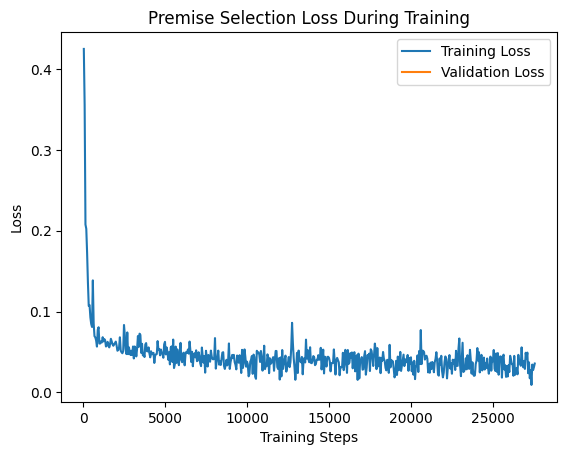

In [92]:
fig, ax = plt.subplots()
ax.plot(train_steps, train_losses, label="Training Loss")
ax.plot(eval_steps, eval_losses, label="Validation Loss")
ax.set_xlabel("Training Steps")
ax.set_ylabel("Loss")
ax.set_title("Premise Selection Loss During Training")
ax.legend()

